In [7]:
import ipyvuetify as v
import ipywidgets as widgets
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [63]:
def convert_to_datetime(df):
    df['Meldedatum'] = pd.to_datetime(df['Meldedatum'], unit='ms')
    return df

def convert_to_date(df):
    df['Meldedatum'] = pd.to_datetime(df['Meldedatum']).dt.date
    return df

def remove_nicht_erhoben(df):
    df = df[df.Bundesland != '-nicht erhoben-']
    df = df[df.Landkreis != '-nicht erhoben-']
    return df

In [42]:
# Load data from RKI
response = requests.get("https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.geojson")

In [ ]:
json.loads(response.text)

In [45]:
raw_data = pd.read_json(response.text)

In [49]:
raw_data = pd.DataFrame([x['properties'] for x in json.loads(response.text)['features']])

In [51]:
# raw_data = pd.DataFrame([x['attributes'] for x in json.loads(response.text)['features']])

In [50]:
raw_data.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis
0,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,M,2,0,154936,2020-03-18T00:00:00.000Z,15003
1,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,W,1,0,154937,2020-03-12T00:00:00.000Z,15003
2,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,W,1,0,154938,2020-03-17T00:00:00.000Z,15003
3,15,Sachsen-Anhalt,SK Magdeburg,A60-A79,M,1,0,154939,2020-03-10T00:00:00.000Z,15003
4,15,Sachsen-Anhalt,SK Magdeburg,A60-A79,M,1,0,154940,2020-03-19T00:00:00.000Z,15003


In [54]:
raw_data['Bundesland'].drop_duplicates()

0               Sachsen-Anhalt
94                   Thüringen
232                     Bremen
281        Nordrhein-Westfalen
1232           -nicht erhoben-
1234        Schleswig-Holstein
1463                   Hamburg
1566             Niedersachsen
2232         Baden-Württemberg
3232                    Bayern
4012                  Saarland
4126                    Berlin
5573               Brandenburg
5770    Mecklenburg-Vorpommern
5884                   Sachsen
6597                    Hessen
7153           Rheinland-Pfalz
Name: Bundesland, dtype: object

In [53]:
raw_data.describe(include='all')

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis
count,8232.000000,8232,8232,8232,8232,8232.000000,8232.000000,8232.000000,8232,8232
unique,NaN,17,406,7,3,NaN,NaN,NaN,34,406
top,NaN,Bayern,LK Heinsberg,A35-A59,M,NaN,NaN,NaN,2020-03-18T00:00:00.000Z,05370
freq,NaN,1647,154,3643,4471,NaN,NaN,NaN,1134,154
mean,7.644072,NaN,NaN,NaN,NaN,2.024295,0.005709,151051.500000,NaN,NaN
std,3.209093,NaN,NaN,NaN,NaN,2.361126,0.076945,2376.518041,NaN,NaN
min,-1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,146936.000000,NaN,NaN
25%,5.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,148993.750000,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,151051.500000,NaN,NaN
75%,9.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,153109.250000,NaN,NaN


In [64]:
cleaned_data = (raw_data
                .pipe(convert_to_date)
                .pipe(remove_nicht_erhoben)
               )

In [65]:
cleaned_data.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis
0,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,M,2,0,154936,2020-03-18,15003
1,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,W,1,0,154937,2020-03-12,15003
2,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,W,1,0,154938,2020-03-17,15003
3,15,Sachsen-Anhalt,SK Magdeburg,A60-A79,M,1,0,154939,2020-03-10,15003
4,15,Sachsen-Anhalt,SK Magdeburg,A60-A79,M,1,0,154940,2020-03-19,15003


In [66]:
cleaned_data['Bundesland'].drop_duplicates()

0               Sachsen-Anhalt
94                   Thüringen
232                     Bremen
281        Nordrhein-Westfalen
1234        Schleswig-Holstein
1463                   Hamburg
1566             Niedersachsen
2232         Baden-Württemberg
3232                    Bayern
4012                  Saarland
4126                    Berlin
5573               Brandenburg
5770    Mecklenburg-Vorpommern
5884                   Sachsen
6597                    Hessen
7153           Rheinland-Pfalz
Name: Bundesland, dtype: object

In [62]:
cleaned_data.describe(include='all')

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis
count,8230.000000,8230,8230,8230,8230,8230.000000,8230.000000,8230.000000,8230,8230
unique,NaN,16,405,7,3,NaN,NaN,NaN,34,405
top,NaN,Bayern,LK Heinsberg,A35-A59,M,NaN,NaN,NaN,2020-03-18,05370
freq,NaN,1647,154,3642,4470,NaN,NaN,NaN,1134,154
mean,7.646173,NaN,NaN,NaN,NaN,2.024544,0.005711,151052.500000,NaN,NaN
std,3.206652,NaN,NaN,NaN,NaN,2.361359,0.076954,2375.940691,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,146938.000000,NaN,NaN
25%,5.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,148995.250000,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,151052.500000,NaN,NaN
75%,9.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,153109.750000,NaN,NaN


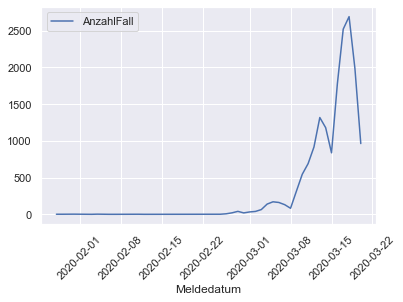

In [73]:
cleaned_data.groupby('Meldedatum').agg({'AnzahlFall': 'sum'}).plot(kind='line', rot=45)

In [80]:
# Nach Landkreis und Alter, Anzahl Fälle und Todesfälle
# Sterberate 
cleaned_data.groupby(['Meldedatum','Landkreis', 'Altersgruppe']).agg({'AnzahlFall': 'mean', 'AnzahlTodesfall': 'mean'})

AnzahlFall  AnzahlTodesfall
Meldedatum Landkreis           Altersgruppe                             
2020-01-28 LK Landsberg a.Lech A15-A34              1.0              0.0
           LK Starnberg        A35-A59              1.0              0.0
2020-01-29 LK Fürstenfeldbruck A15-A34              1.0              0.0
           SK München          A15-A34              1.0              0.0
2020-01-31 LK Fürstenfeldbruck A35-A59              1.0              0.0
...                                                 ...              ...
2020-03-20 SK Wiesbaden        A35-A59              4.5              0.0
                               A60-A79              2.0              0.0
           SK Worms            A35-A59              1.0              0.0
           SK Würzburg         A80+                 1.0              1.0
           SK Zweibrücken      A35-A59              1.0              0.0

[6038 rows x 2 columns]

In [77]:
sorted(cleaned_data['Meldedatum'].drop_duplicates().values)

[datetime.date(2020, 1, 28),
 datetime.date(2020, 1, 29),
 datetime.date(2020, 1, 31),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 6),
 datetime.date(2020, 2, 7),
 datetime.date(2020, 2, 11),
 datetime.date(2020, 2, 12),
 datetime.date(2020, 2, 25),
 datetime.date(2020, 2, 26),
 datetime.date(2020, 2, 27),
 datetime.date(2020, 2, 28),
 datetime.date(2020, 2, 29),
 datetime.date(2020, 3, 1),
 datetime.date(2020, 3, 2),
 datetime.date(2020, 3, 3),
 datetime.date(2020, 3, 4),
 datetime.date(2020, 3, 5),
 datetime.date(2020, 3, 6),
 datetime.date(2020, 3, 7),
 datetime.date(2020, 3, 8),
 datetime.date(2020, 3, 9),
 datetime.date(2020, 3, 10),
 datetime.date(2020, 3, 11),
 datetime.date(2020, 3, 12),
 datetime.date(2020, 3, 13),
 datetime.date(2020, 3, 14),
 datetime.date(2020, 3, 15),
 datetime.date(2020, 3, 16),
 datetime.date(2020, 3, 17),
 datetime.date(2020, 3, 18),
 datetime.date(2020, 3, 19),
 datetime.date(2020, 3, 20)]